In [1]:
from models.tacotron2 import Tacotron2Wave
import torch
import torchaudio

In [10]:
import tensorflow as tf

if tf.config.experimental.list_physical_devices('GPU'):
    print("TensorFlow will run on GPU.")
    gpus = []#tf.config.experimental.list_physical_devices('GPU')
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
else:
    print("TensorFlow will run on CPU.")

TensorFlow will run on CPU.


In [2]:
input_text = "أنا اسمي فريدة"

In [4]:
! pip install farasapy

In [7]:
! pip install pandas numpy

In [9]:
import pandas as pd
from farasa.diacratizer import FarasaDiacritizer

diacritizer = FarasaDiacritizer()
# Diacritize the input text
diacritized_text = diacritizer.diacritize(input_text)
print(diacritized_text)

أَنا اسْمي فَريدَةٌ


In [13]:
!pip install PyDrive

     ---------------------------------------- 0.0/987.4 kB ? eta -:--:--
     ---------------------------------------- 10.2/987.4 kB ? eta -:--:--
     - ----------------------------------- 30.7/987.4 kB 330.3 kB/s eta 0:00:03
     -- ---------------------------------- 61.4/987.4 kB 469.7 kB/s eta 0:00:02
     ---- ------------------------------- 122.9/987.4 kB 722.1 kB/s eta 0:00:02
     --------- ---------------------------- 256.0/987.4 kB 1.2 MB/s eta 0:00:01
     -------------- ----------------------- 368.6/987.4 kB 1.4 MB/s eta 0:00:01
     ---------------------- --------------- 573.4/987.4 kB 1.8 MB/s eta 0:00:01
     --------------------------- ---------- 716.8/987.4 kB 2.1 MB/s eta 0:00:01
     ----------------------------------- -- 911.4/987.4 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 987.4/987.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ----------------------------

In [14]:
pip install camel-tools


     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     ------- -------------------------------- 10.2/58.1 kB ? eta -:--:--
     -------------------- ----------------- 30.7/58.1 kB 330.3 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/58.1 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 58.1/58.1 kB 382.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     ---------------------------------------- 43.8/43.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   -----------------------------------

In [17]:
import os
import pandas as pd
from camel_tools.utils.charmap import CharMapper

# Set the environment variable for camel-tools
os.environ['CAMELTOOLS_DATA'] = r'C:\UNI\Term 8\Deep Learning\Arabic TTS\camel_tools-master'  # Using raw string for Windows path



In [18]:
# Function to apply CharMapper to a sentence, handling NaN values
def map_sentence(sentence):
    if pd.isna(sentence):
        return ""
    else:
        ar2bw = CharMapper.builtin_mapper('ar2bw')
        return ar2bw(sentence)

In [21]:
buckwalter_text = map_sentence(diacritized_text)
print(buckwalter_text)

>anA Asomy farydapN


In [22]:
import subprocess

# Call inferencetest.py using subprocess
subprocess.run(['python', 'inferencetest.py', '--input_text', buckwalter_text])

CompletedProcess(args=['python', 'inf2.py', '--input_text', '>anA Asomy farydapN'], returncode=0)

In [24]:
from IPython.display import Audio

# Define the path to the output audio file
output_audio_path = "output_audio2.wav"

# Play the audio directly in the notebook
Audio(output_audio_path)

In [29]:
pip install matplotlib

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     ------------- ----------------------- 61.4/162.8 kB 812.7 kB/s eta 0:00:01
     ---------------------------- --------- 122.9/162.8 kB 1.0 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.2/8.0 MB 4.6 MB/s eta 0:00:02
   - -------------------------------------- 0.4/8.0 MB 3.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.0 MB 3.8 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.0 MB 4.2 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.0 MB 3.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/8.0 MB 4.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.0 MB 4.0 MB/s eta 0:00:02
   ------- -

In [26]:
from models.tacotron2 import Tacotron2Wave

model = Tacotron2Wave('checkpoints/exp_tc2/states.pth')
# model = model.to(device=device)

wave, mel_spec = model.tts(diacritized_text, return_mel=True, denoise=0.005)


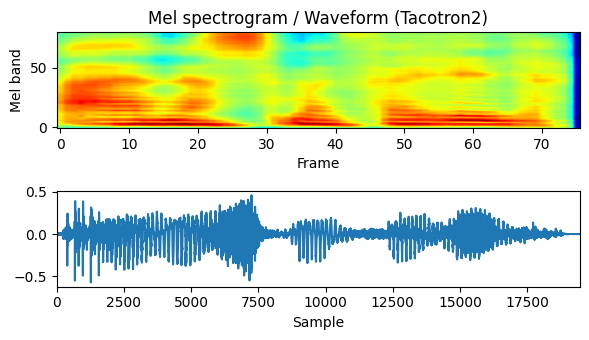

In [30]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 3.5))
ax1.imshow(mel_spec.cpu(), origin='lower', aspect='auto', cmap='jet')
ax1.set_xlabel('Frame')
ax1.set_ylabel('Mel band')
ax1.set_title("Mel spectrogram / Waveform (Tacotron2)")
ax2.plot(wave)
ax2.set_xlim(0, len(wave))
ax2.set_xlabel('Sample')
fig.tight_layout()